In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, GRU, Dense, Bidirectional
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, accuracy_score

In [2]:
# Load bitcoin price data
btc_2017 = pd.read_csv('/Users/V/V Projects/Bitcoin/btc/BTC-2017min.csv')
btc_2018 = pd.read_csv('/Users/V/V Projects/Bitcoin/btc/BTC-2018min.csv')
btc_2019 = pd.read_csv('/Users/V/V Projects/Bitcoin/btc/BTC-2019min.csv')
btc_2020 = pd.read_csv('/Users/V/V Projects/Bitcoin/btc/BTC-2020min.csv')
btc_2021 = pd.read_csv('/Users/V/V Projects/Bitcoin/btc/BTC-2021min.csv')

# Combine the datasets
bitcoin_data = pd.concat([btc_2017, btc_2018, btc_2019, btc_2020, btc_2021])

# Reset the index of the combined dataset
df = bitcoin_data.reset_index(drop=True)

# Print the combined dataset
print(df)

               unix                 date   symbol      open      high   
0        1514764740  2017-12-31 23:59:00  BTC/USD  13913.28  13913.28  \
1        1514764680  2017-12-31 23:58:00  BTC/USD  13913.26  13953.83   
2        1514764620  2017-12-31 23:57:00  BTC/USD  13908.73  13913.26   
3        1514764560  2017-12-31 23:56:00  BTC/USD  13827.00  13908.69   
4        1514764500  2017-12-31 23:55:00  BTC/USD  13825.05  13825.05   
...             ...                  ...      ...       ...       ...   
2675296  1609459500  2021-01-01 00:05:00  BTC/USD  29021.86  29023.38   
2675297  1609459440  2021-01-01 00:04:00  BTC/USD  29048.13  29057.73   
2675298  1609459380  2021-01-01 00:03:00  BTC/USD  29037.68  29069.39   
2675299  1609459320  2021-01-01 00:02:00  BTC/USD  29069.80  29073.02   
2675300  1609459260  2021-01-01 00:01:00  BTC/USD  29007.31  29086.90   

              low     close  Volume BTC     Volume USD  
0        13867.18  13880.00    0.591748    8213.456549  
1        

In [3]:
# Total number of data points in the bitcoin dataset
df.shape[0]

2675301

In [4]:
# Preprocess the data
data = df['close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [5]:
# Split the data into training and testing sets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

In [6]:
# Prepare the training data
window_size = 20  # Number of previous days' prices to use as input
X_train, y_train = [], []
for i in range(window_size, len(train_data)):
    X_train.append(train_data[i-window_size:i, 0])
    y_train.append(train_data[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [7]:
# Reshape the data for LSTM input
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [8]:
# Build the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(units=1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the LSTM model
lstm_model.fit(X_train, y_train, epochs=10, batch_size=32)

# Prepare the testing data
X_test, y_test = [], []
for i in range(window_size, len(test_data)):
    X_test.append(test_data[i-window_size:i, 0])
    y_test.append(test_data[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)

# Reshape the data for LSTM input
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Predict using the LSTM model
predicted_data_lstm = lstm_model.predict(X_test)
predicted_data_lstm = scaler.inverse_transform(predicted_data_lstm)

Epoch 1/10
66882/66882 [==============================] - 739s 11ms/step - loss: 2.7636e-06
Epoch 2/10
66882/66882 [==============================] - 743s 11ms/step - loss: 5.9191e-07
Epoch 3/10
66882/66882 [==============================] - 731s 11ms/step - loss: 5.0830e-07
Epoch 4/10
66882/66882 [==============================] - 728s 11ms/step - loss: 4.5838e-07
Epoch 5/10
66882/66882 [==============================] - 738s 11ms/step - loss: 4.3915e-07
Epoch 6/10
66882/66882 [==============================] - 725s 11ms/step - loss: 4.0826e-07
Epoch 7/10
66882/66882 [==============================] - 883s 13ms/step - loss: 4.0036e-07
Epoch 8/10
66882/66882 [==============================] - 728s 11ms/step - loss: 3.8054e-07
Epoch 9/10
66882/66882 [==============================] - 724s 11ms/step - loss: 3.7618e-07
Epoch 10/10
16721/16721 [==============================] - 50s 3ms/step


In [9]:
# Build the GRU model
gru_model = Sequential()
gru_model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
gru_model.add(GRU(units=50))
gru_model.add(Dense(units=1))
gru_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the GRU model
gru_model.fit(X_train, y_train, epochs=10, batch_size=32)

# Predict using the GRU model
predicted_data_gru = gru_model.predict(X_test)
predicted_data_gru = scaler.inverse_transform(predicted_data_gru)

Epoch 1/10
66882/66882 [==============================] - 769s 11ms/step - loss: 3.7524e-06
Epoch 2/10
66882/66882 [==============================] - 744s 11ms/step - loss: 5.4189e-07
Epoch 3/10
66882/66882 [==============================] - 772s 12ms/step - loss: 4.8432e-07
Epoch 4/10
66882/66882 [==============================] - 767s 11ms/step - loss: 4.4203e-07
Epoch 5/10
66882/66882 [==============================] - 759s 11ms/step - loss: 4.2284e-07
Epoch 6/10
66882/66882 [==============================] - 758s 11ms/step - loss: 4.0683e-07
Epoch 7/10
66882/66882 [==============================] - 751s 11ms/step - loss: 3.9203e-07
Epoch 8/10
66882/66882 [==============================] - 742s 11ms/step - loss: 3.8418e-07
Epoch 9/10
66882/66882 [==============================] - 735s 11ms/step - loss: 3.8053e-07
Epoch 10/10
16721/16721 [==============================] - 45s 3ms/step


In [27]:
# Build the ARIMA model
import statsmodels.api as smapi
arima_model = smapi.tsa.arima.ARIMA(train_data, order=(2, 0, 1))
arima_model_fit = arima_model.fit(method_kwargs={'warn_convergence': False})

# Predict using the ARIMA model
predicted_data_arima = arima_model_fit.forecast(steps=len(X_test))[0].reshape(-1, 1)
predicted_data_arima = scaler.inverse_transform(predicted_data_arima)

In [12]:
# Build the Bi-LSTM model
bilstm_model = Sequential()
bilstm_model.add(Bidirectional(LSTM(units=50, return_sequences=True), input_shape=(X_train.shape[1], 1)))
bilstm_model.add(Bidirectional(LSTM(units=50)))
bilstm_model.add(Dense(units=1))
bilstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the Bi-LSTM model
bilstm_model.fit(X_train, y_train, epochs=10, batch_size=32)

# Predict using the Bi-LSTM model
predicted_data_bilstm = bilstm_model.predict(X_test)
predicted_data_bilstm = scaler.inverse_transform(predicted_data_bilstm)

Epoch 1/10
66882/66882 [==============================] - 1015s 15ms/step - loss: 2.4222e-06
Epoch 2/10
66882/66882 [==============================] - 2502s 37ms/step - loss: 5.4669e-07
Epoch 3/10
66882/66882 [==============================] - 590s 9ms/step - loss: 4.6055e-07
Epoch 4/10
66882/66882 [==============================] - 636s 10ms/step - loss: 4.3225e-07
Epoch 5/10
66882/66882 [==============================] - 634s 9ms/step - loss: 4.0909e-07
Epoch 6/10
66882/66882 [==============================] - 619s 9ms/step - loss: 4.0072e-07
Epoch 7/10
66882/66882 [==============================] - 625s 9ms/step - loss: 3.8009e-07
Epoch 8/10
66882/66882 [==============================] - 614s 9ms/step - loss: 3.6787e-07
Epoch 9/10
66882/66882 [==============================] - 1629s 24ms/step - loss: 3.6081e-07
Epoch 10/10
16721/16721 [==============================] - 39s 2ms/step


In [21]:
# Calculate accuracy and RMSE loss for each model
actual_data = scaler.inverse_transform(test_data)
# Truncate actual_data to match the length of predicted_data_lstm
actual_data = actual_data[-len(predicted_data_lstm):]

# Calculate RMSE for LSTM
rmse_lstm = np.sqrt(mean_squared_error(actual_data, predicted_data_lstm))

# Calculate accuracy for LSTM
y_true_lstm = np.sign(actual_data[1:] - actual_data[:-1])
y_pred_lstm = np.sign(predicted_data_lstm[1:] - predicted_data_lstm[:-1])
accuracy_lstm = accuracy_score(y_true_lstm, y_pred_lstm)

In [23]:
rmse_gru = np.sqrt(mean_squared_error(actual_data, predicted_data_gru))
accuracy_gru = accuracy_score(np.sign(actual_data[1:] - actual_data[:-1]), np.sign(predicted_data_gru[1:] - predicted_data_gru[:-1]))

In [31]:
# Truncate actual_data to match the length of predicted_data_arima
actual_data_truncated = actual_data[-len(predicted_data_arima):]


In [32]:
# Calculate RMSE for ARIMA
rmse_arima = np.sqrt(mean_squared_error(actual_data_truncated, predicted_data_arima))


In [26]:
rmse_bilstm = np.sqrt(mean_squared_error(actual_data, predicted_data_bilstm))
accuracy_bilstm = accuracy_score(np.sign(actual_data[1:] - actual_data[:-1]), np.sign(predicted_data_bilstm[1:] - predicted_data_bilstm[:-1]))

In [35]:

print("LSTM - RMSE:", rmse_lstm, "Accuracy:", accuracy_lstm)
print("GRU - RMSE:", rmse_gru, "Accuracy:", accuracy_gru)
# print("ARIMA - RMSE:", rmse_arima, "Accuracy:", accuracy_arima)
print("Bi-LSTM - RMSE:", rmse_bilstm, "Accuracy:", accuracy_bilstm)

LSTM - RMSE: 346.11682757060106 Accuracy: 0.4779549192583732
GRU - RMSE: 584.4162022920783 Accuracy: 0.4767381877990431
Bi-LSTM - RMSE: 226.1290207244221 Accuracy: 0.4774540221291866


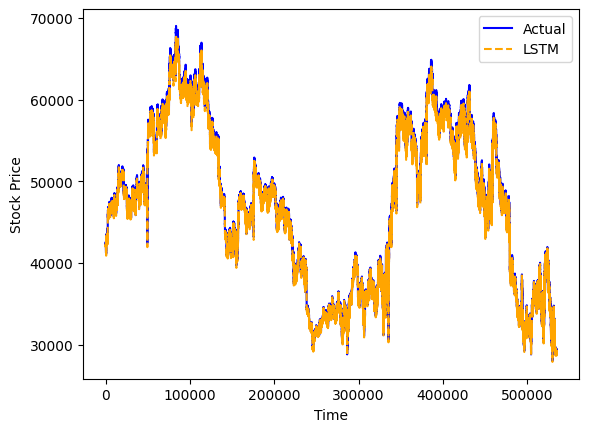

In [38]:
# Plot the results
plt.plot(actual_data, label='Actual', color='blue', linestyle='-')
plt.plot(predicted_data_lstm, label='LSTM', color='orange', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

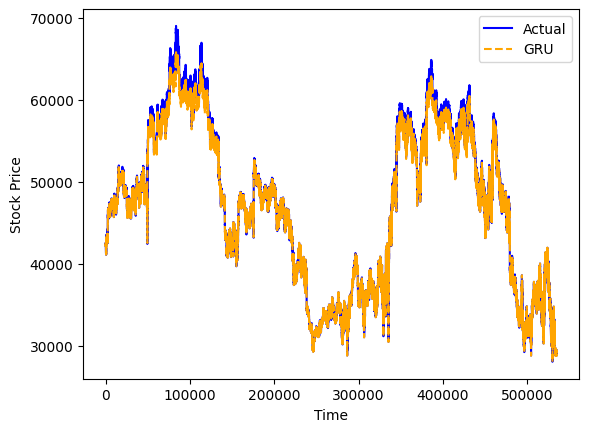

In [39]:
# Plot the results
plt.plot(actual_data, label='Actual', color='blue', linestyle='-')
plt.plot(predicted_data_gru, label='GRU', color='orange', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

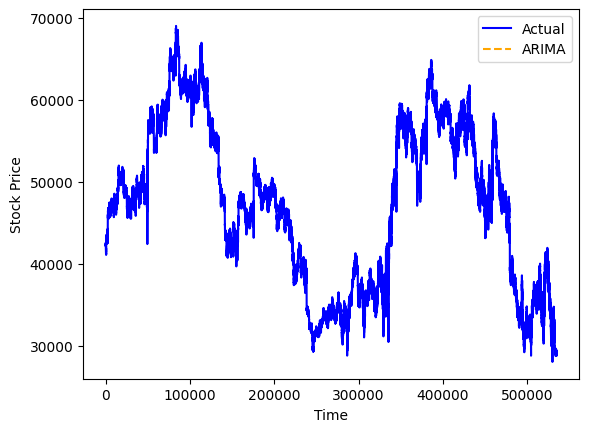

In [40]:
# Plot the results
plt.plot(actual_data, label='Actual', color='blue', linestyle='-')
plt.plot(predicted_data_arima, label='ARIMA', color='orange', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

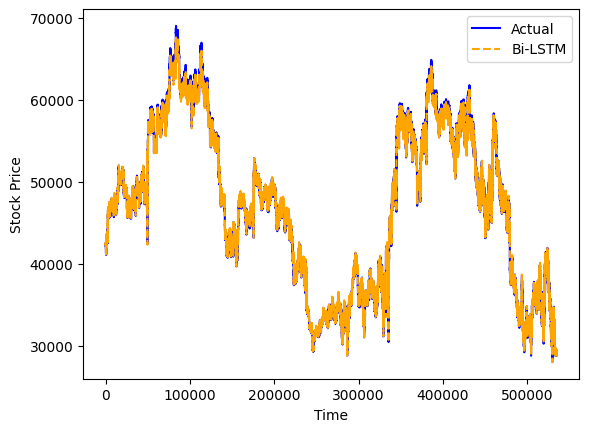

In [41]:
# Plot the results
plt.plot(actual_data, label='Actual', color='blue', linestyle='-')
plt.plot(predicted_data_bilstm, label='Bi-LSTM', color='orange', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [42]:
# Create a dictionary to store RMSE values
rmse_values = {
    'LSTM': rmse_lstm,
    'GRU': rmse_gru,
    'ARIMA': rmse_arima,
    'Bi-LSTM': rmse_bilstm
}

# Find the model with the lowest RMSE
best_model = min(rmse_values, key=rmse_values.get)

# Print the RMSE values
for model, rmse in rmse_values.items():
    print(f"{model} - RMSE: {rmse}")

# Print the best performing model
print(f"\nBest Model: {best_model}")

LSTM - RMSE: 346.11682757060106
GRU - RMSE: 584.4162022920783
ARIMA - RMSE: 12419.536161606462
Bi-LSTM - RMSE: 226.1290207244221

Best Model: Bi-LSTM


In [45]:
# Define the threshold percentage
threshold_percentage = 1.0 

# Calculate the percentage of predictions within the threshold percentage for each model
accuracy_lstm = (np.sum(np.abs(predicted_data_lstm - actual_data) <= (actual_data * threshold_percentage / 100)) / len(actual_data)) * 100
accuracy_gru = (np.sum(np.abs(predicted_data_gru - actual_data) <= (actual_data * threshold_percentage / 100)) / len(actual_data)) * 100
accuracy_arima = (np.sum(np.abs(predicted_data_arima - actual_data) <= (actual_data * threshold_percentage / 100)) / len(actual_data)) * 100
accuracy_bilstm = (np.sum(np.abs(predicted_data_bilstm - actual_data) <= (actual_data * threshold_percentage / 100)) / len(actual_data)) * 100

# Print the accuracy percentage for each model
print("Accuracy Percentage:")
print("LSTM:", accuracy_lstm)
print("GRU:", accuracy_gru)
print("ARIMA:", accuracy_arima)
print("Bi-LSTM:", accuracy_bilstm)

Accuracy Percentage:
LSTM: 92.76018099547511
GRU: 77.75572339316052
ARIMA: 1.0860849916174649
Bi-LSTM: 97.04602077223988
